### Гендерная классификация

Гендер — это социальная конструкция. То, как по-разному относятся к мальчикам и девочкам с рождения, формирует их поведение и личные предпочтения в соответствии с тем, что общество ожидает от их пола.
## Постановка задачи

Этот небольшой набор данных предназначен для того, чтобы дать представление о том, можно ли предсказать пол человека с точностью значительно выше 50% на основе его личных предпочтений.

### Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Загрузка данных

In [3]:
df = pd.read_csv('Transformed Data Set - Sheet1.csv')

In [15]:
# Просматриваем наш файл 

In [5]:
df.head(66)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


#### Описание данных

Признаки:


- Favorite Color – Любимый цвет
- Favorite Music Genre	 – Любимый жанр музыки
- Favorite Beverage	 – Любимая выпивка
- Favorite Soft Drink – Любимый напиток/газировка

Целевой (искомый) признак:
- Gender – Гендер

In [25]:
# Количество данных 
df.shape

(66, 5)

### 1. Предобработка данных

In [28]:
# информация о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [30]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


В целом анамальных значений не обнаружено, он является полностью заполненым, только со строковым типом данных.

In [35]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке Favorite Color = 0
Кол-во пропусков в колонке Favorite Music Genre = 0
Кол-во пропусков в колонке Favorite Beverage = 0
Кол-во пропусков в колонке Favorite Soft Drink = 0
Кол-во пропусков в колонке Gender = 0


In [80]:
# Проверка на дублирование записей
df.duplicated().sum()

4

In [61]:
df['Favorite Color'].value_counts()

Favorite Color
Cool       37
Warm       22
Neutral     7
Name: count, dtype: int64

In [63]:
df['Favorite Music Genre'].value_counts()

Favorite Music Genre
Rock                19
Pop                 17
Hip hop              8
Electronic           8
R&B and soul         6
Folk/Traditional     4
Jazz/Blues           4
Name: count, dtype: int64

In [65]:
df['Favorite Beverage'].value_counts()

Favorite Beverage
Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: count, dtype: int64

In [67]:
df['Favorite Soft Drink'].value_counts()

Favorite Soft Drink
Coca Cola/Pepsi    32
Fanta              14
7UP/Sprite         13
Other               7
Name: count, dtype: int64

In [69]:
df['Gender'].value_counts()

Gender
F    33
M    33
Name: count, dtype: int64

In [7]:
# Удалить дубликаты, показать строки  
df.drop_duplicates().head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


### Вывод


Вывели 4 дубликата, но после тщательного просмотра, вынесли вердикт о том, что данные дубликаты не являются таковыми.

### 2. Визуальный анализ

<Axes: ylabel='proportion'>

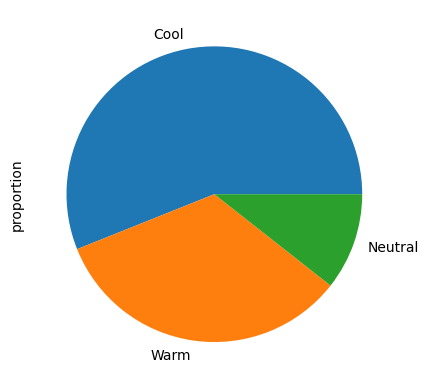

In [9]:
df['Favorite Color'].value_counts(normalize=True).plot.pie()

<Axes: ylabel='proportion'>

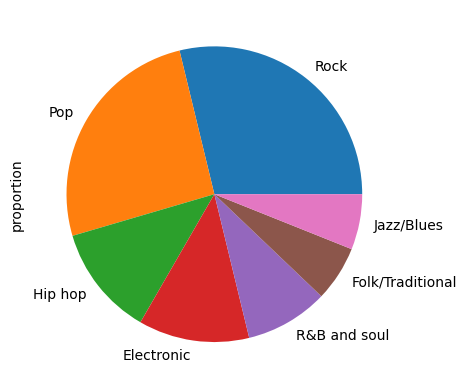

In [94]:
df['Favorite Music Genre'].value_counts(normalize=True).plot.pie()

<Axes: ylabel='proportion'>

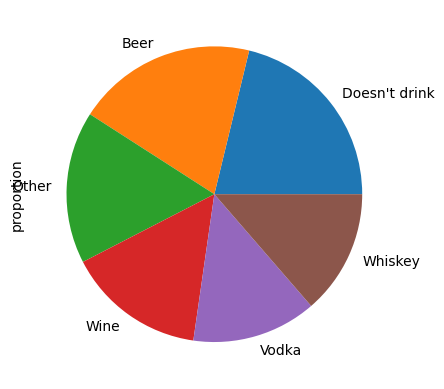

In [96]:
df['Favorite Beverage'].value_counts(normalize=True).plot.pie()

<Axes: ylabel='proportion'>

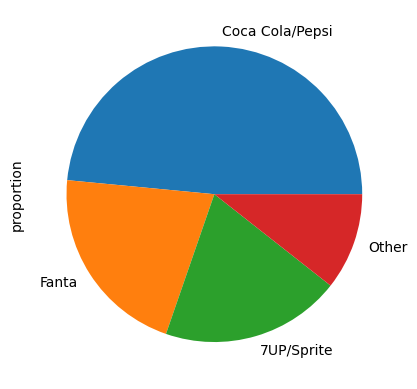

In [98]:
df['Favorite Soft Drink'].value_counts(normalize=True).plot.pie()

In [11]:
df['Gender']=df['Gender'].replace('F', '0')
df['Gender']=df['Gender'].replace('M', '1')
df['Gender'].value_counts()

Gender
0    33
1    33
Name: count, dtype: int64

<Axes: xlabel='Gender'>

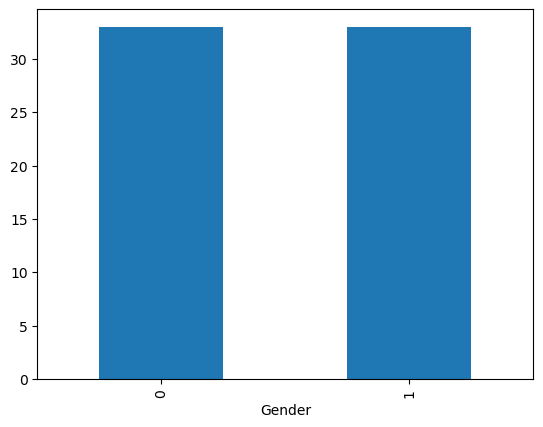

In [13]:
df['Gender'].value_counts(normalize=False).plot.bar()

In [31]:
Favorite_Color = {'Cool': 1, 'Warm': 2, 'Neutral': 3}
df['Favorite Color'] = df['Favorite Color'].replace(Favorite_Color)

In [37]:
Favorite_Music_Genre = {'Rock': 1, 'Pop': 2, 'Hip hop': 3, 'Electronic': 4, 'R&B and soul': 5, 'Folk/Traditional': 6, 'Jazz/Blues': 7}
df['Favorite Music Genre'] = df['Favorite Music Genre'].replace(Favorite_Music_Genre)

In [51]:
Favorite_Soft_Drink = {'Coca Cola/Pepsi':1,'Fanta':2,'7UP/Sprite':3,'Other':4}
df['Favorite Soft Drink']= df['Favorite Soft Drink'].replace(Favorite_Soft_Drink)

In [53]:
Favorite_Beverage = {"Doesn't drink": 1, 'Beer': 2, 'Other': 3, 'Wine': 4, 'Vodka': 5, 'Whiskey': 6}
df['Favorite Beverage'] = df['Favorite Beverage'].replace(Favorite_Beverage)

In [55]:
df.head(10)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,1,1,5,3,0
1,3,3,5,1,0
2,2,1,4,1,0
3,2,6,6,2,0
4,1,1,5,1,0
5,2,7,1,2,0
6,1,2,2,1,0
7,2,2,6,2,0
8,2,1,3,3,0
9,3,2,4,1,0


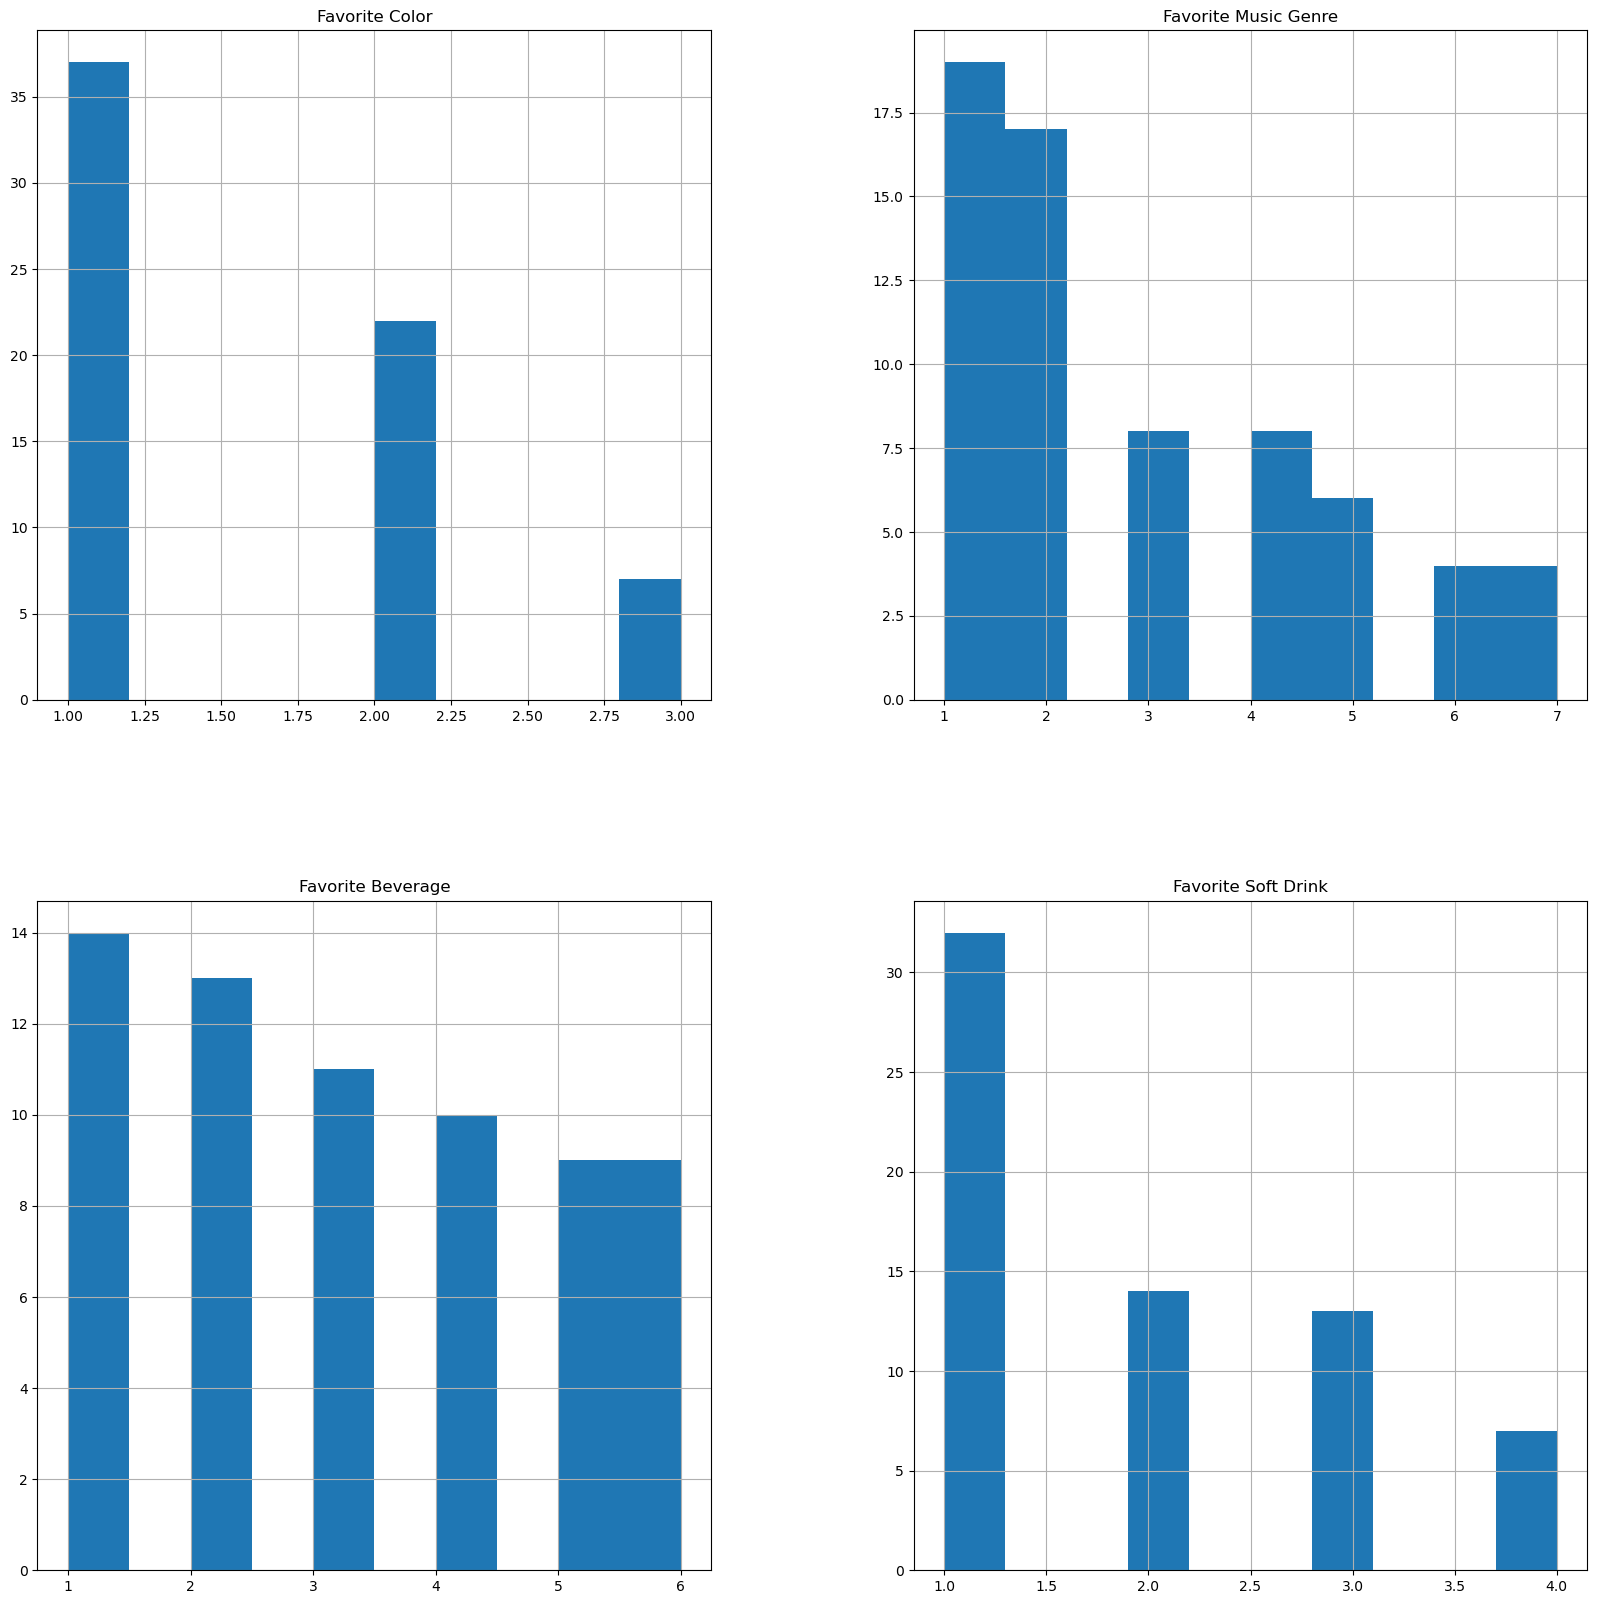

In [63]:
df.hist(figsize=(20,20));

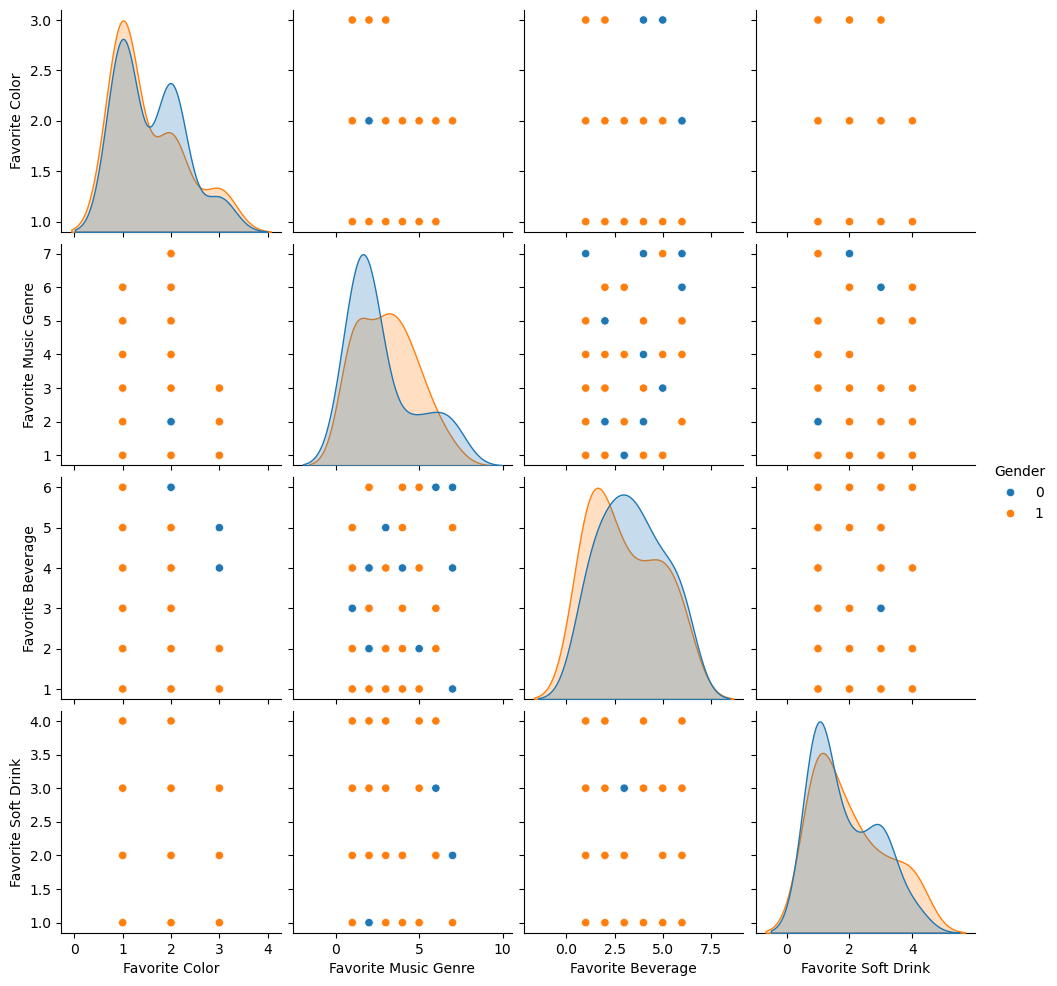

In [69]:
sns.pairplot(df[['Favorite Color','Favorite Music Genre','Favorite Beverage','Favorite Soft Drink', "Gender"]], hue = 'Gender')

К сожалению зависимости не наблюдается.

In [59]:
corr = df[['Gender','Favorite Soft Drink','Favorite Beverage','Favorite Music Genre','Favorite Color']].corr()
corr

,Gender,Favorite Soft Drink,Favorite Beverage,Favorite Music Genre,Favorite Color
Gender,1.000000,0.072221,-0.106315,0.090416,-0.044677
Favorite Soft Drink,0.072221,1.000000,-0.041719,0.003681,-0.112286
Favorite Beverage,-0.106315,-0.041719,1.000000,0.117682,-0.008312
Favorite Music Genre,0.090416,0.003681,0.117682,1.000000,0.106863
Favorite Color,-0.044677,-0.112286,-0.008312,0.106863,1.000000


<Axes: >

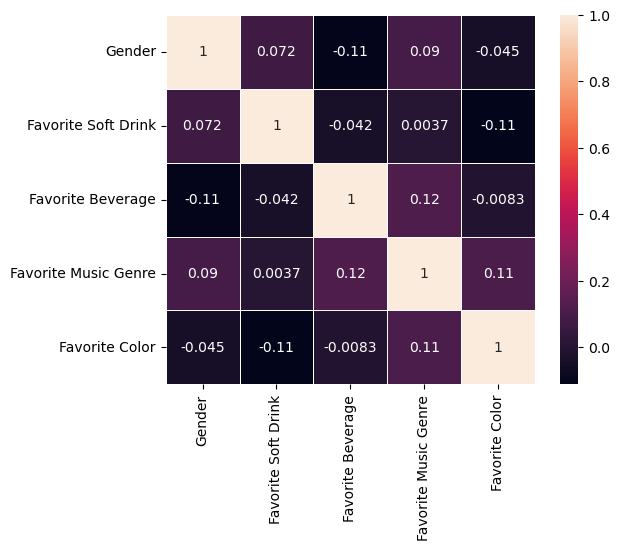

In [65]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

### 3. Обучение классификатора

### Формирование дата-сета для обучения моделей

In [89]:
# список имён признаков, которые будут использоваться для построения модели
column_names = ['Favorite Soft Drink','Favorite Beverage','Favorite Music Genre','Favorite Color']

In [91]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[column_names]], axis = 1)
X.shape

(66, 4)

In [93]:
X.head()

,Favorite Soft Drink,Favorite Beverage,Favorite Music Genre,Favorite Color
0,3,5,1,1
1,1,5,3,3
2,1,4,1,2
3,2,6,6,2
4,1,5,1,1


In [99]:
# выделение целевой переменной в отдельный вектор
y = df['Gender']

### Создание моделей

In [106]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [108]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(44, 4) (22, 4) (44,) (22,)


In [110]:
from sklearn.metrics import accuracy_score

### KNeighborsClassifier (Классификация ближайших соседей)

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 2.99 ms


KNeighborsClassifier()

In [120]:
# Предугадываем тренировочную выборку 
knn.predict(X_test)

array(['1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0',
       '1', '0', '1', '1', '0', '0', '1', '0', '0'], dtype=object)

In [122]:
# измерение производительности
y_train_predict = knn.predict(X_train) 
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.7045454545454546
test accuracy:  0.45454545454545453


In [124]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)

### Вывод:

Этот метод плохо подходит для данного датасета, определив ближайших соседей, можно сказать что не смотря на разный пол люди с похожими вкусами могут быть разных полов. 

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [133]:
from sklearn.naive_bayes import GaussianNB

In [150]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 0 ns
Wall time: 990 μs


GaussianNB()

In [152]:
# измерение производительности
gnb_y_train_predict = gnb.predict(X_train)
gnb_y_test_predict = gnb.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, gnb_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, gnb_y_test_predict, normalize=True))

train accuracy:  0.5
test accuracy:  0.8181818181818182


In [141]:
gnb_accuracy = accuracy_score(y_test, gnb_y_test_predict)

### Вывод:

Здесь все плохо и неизвестно почему тренировочная часть меньше по процентам, чем тестируемая.  

### Random Forest Classifier (Классификатор дерева решений)

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 141 ms
Wall time: 115 ms


In [201]:
rfc_y_train_predict = rfc.predict(X_train)
rfc_y_test_predict = rfc.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, rfc_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, rfc_y_test_predict, normalize=True))

train accuracy:  0.9772727272727273
test accuracy:  0.5


In [163]:
rfc_accuracy = accuracy_score(y_test, rfc_y_test_predict)

### Вывод:

Этот метод не подходит для данного датасета, в первом случае Классификатор дерева решений переучился запомнив данные и справился хорошо, но с тествой частью он справился плохо. Видимо это из-за того что между данными не было взаимвосвязей.

### Logistic Regression (Логистическая регрессия)

In [174]:
from sklearn.linear_model import LogisticRegression

In [176]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [178]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 19.2 ms


LogisticRegression(random_state=42)

In [184]:
# performance measurement
from sklearn.metrics import accuracy_score
lr_y_train_predict = lr.predict(X_train)
lr_y_test_predict = lr.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, lr_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, lr_y_test_predict, normalize=True))

train accuracy:  0.5909090909090909
test accuracy:  0.4090909090909091


In [190]:
lr_accuracy = accuracy_score(y_test, lr_y_test_predict)

## Метрики классификации, оценка моделей

In [193]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [195]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]

In [197]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.454545
1,Gaussian Naive Bayes,0.818182
2,Random Forest Classifier,0.500000
3,Logistic Regression,0.409091


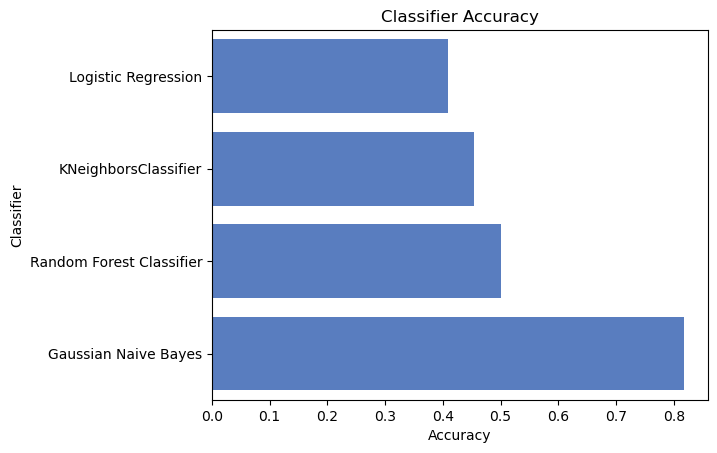

In [203]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

### F1-score

**F1-score** - это гармоническое среднее между precision и recall. Она учитывает оба этих параметра и находит некоторый баланс между ними.

__Precision (точность)__ показывает, какая доля объектов, отнесенных моделью к некоторому классу, действительно принадлежит этому классу.
Precision показывает, какая доля предсказанных положительных примеров действительно является положительными. Это важно в задачах, где ложноположительные ошибки могут быть дорогостоящими, например, в медицинской диагностике.

**Recall (полнота)** показывает, какую долю объектов некоторого класса из всех объектов этого класса нашла модель.
Recall измеряет, какую долю реальных положительных примеров модель смогла правильно предсказать. Это важно в задачах, где пропуск положительных примеров может быть критичным, например, в обнаружении мошенничества.

In [231]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [254]:
print('test f1_score: ', f1_score(y_test, y_test_predict, pos_label='1'))

test f1_score:  0.45454545454545453


In [256]:
print('test f1_score: ', f1_score(y_test, gnb_y_test_predict, pos_label='1'))

test f1_score:  0.8


In [258]:
print('test f1_score: ', f1_score(y_test, rfc_y_test_predict, pos_label='1'))

test f1_score:  0.47619047619047616


In [260]:
print('test f1_score: ', f1_score(y_test, lr_y_test_predict, pos_label='1'))

test f1_score:  0.48


In [262]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.38      0.56      0.45         9

    accuracy                           0.45        22
   macro avg       0.47      0.47      0.45        22
weighted avg       0.49      0.45      0.45        22



In [267]:
print(classification_report( y_test, gnb_y_test_predict))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.73      0.89      0.80         9

    accuracy                           0.82        22
   macro avg       0.82      0.83      0.82        22
weighted avg       0.83      0.82      0.82        22



In [269]:
print(classification_report( y_test, rfc_y_test_predict))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.42      0.56      0.48         9

    accuracy                           0.50        22
   macro avg       0.51      0.51      0.50        22
weighted avg       0.53      0.50      0.50        22



In [271]:
print(classification_report( y_test, lr_y_test_predict))

              precision    recall  f1-score   support

           0       0.50      0.23      0.32        13
           1       0.38      0.67      0.48         9

    accuracy                           0.41        22
   macro avg       0.44      0.45      0.40        22
weighted avg       0.45      0.41      0.38        22



### Общий вывод
Лучше всего себя показал метод: Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР), но при этом у него получилось 